# Rodriguez's Formula

Given a point $\vec P$ and an axis $\vec n$, the Rodriguez's formula help us to find the position of the new point $\vec P'$ after rotating $\vec P$ around $\vec n$ - $\theta$ degrees.

First we will show how to do it using the full algebric way.

In [1]:
# import librarys
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure
import numpy as np
%matplotlib notebook

In [2]:
# P is a point in space
P = np.array([2,2,1]) # vector to rotate
P_txt = "("+str(P[0])+","+str(P[1])+","+str(P[2])+")"
P_len = np.sqrt(np.dot(P,P))

# rotation axis
rotAx = np.array([1,1,2]) # rotation axis, not normalized
n_hat = rotAx/np.sqrt(np.dot(rotAx,rotAx)) # normlized rotation axis

<IPython.core.display.Javascript object>


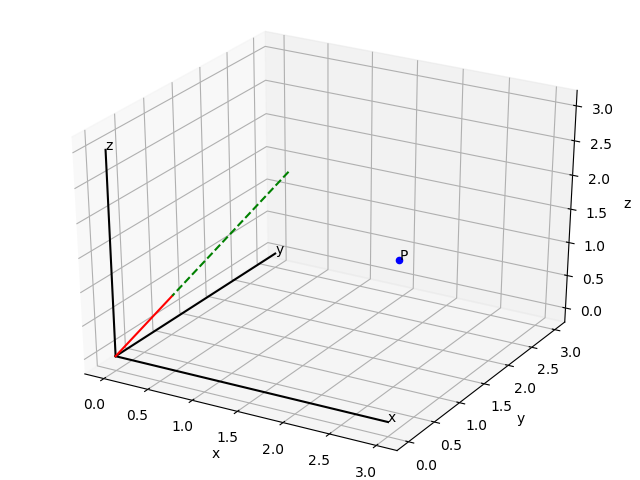

In [3]:
# Plot:
axLim = 3
# initialize plot:
fig = figure()
ax = Axes3D(fig)
# data:
ax.scatter(P[0],P[1],P[2],color='b') 
# plot text:
ax.text(P[0],P[1],P[2],"P", size=10, zorder=1, color='k') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# plot axis:
ax.plot((-0,axLim),(0,0),(0,0), color='k')
ax.plot((0,0),(-0,axLim),(0,0), color='k')
ax.plot((0,0),(0,0),(-0,axLim), color='k')
ax.text(axLim,0,0,"x", size=10, zorder=1, color='k') 
ax.text(0,axLim,0,"y", size=10, zorder=1, color='k') 
ax.text(0,0,axLim,"z", size=10, zorder=1, color='k') 

# plot rotation axis
ax.plot((n_hat[0],0),(n_hat[1],0),(n_hat[2],0), color='r')
ax.plot((P_len*n_hat[0],n_hat[0]),(P_len*n_hat[1],n_hat[1]),(P_len*n_hat[2],n_hat[2]), color='g',linestyle='dashed')

pyplot.show()

## Strate Foreward Calculation (without formula)

In [6]:
n = np.dot(n_hat,P)*n_hat
r_1 = P-n
r_2 = np.cross(n_hat,r_1)

# circle
sampleNum = 100
theta = np.linspace(0,2*np.pi,sampleNum)
circlePoints = np.zeros((sampleNum,3))
for i in range(sampleNum):
    circlePoints[i] = np.cos(theta[i])*r_1 + np.sin(theta[i])*r_2 + n

theta_0 = np.random.randint(0,sampleNum)
P_prm = circlePoints[theta_0]

<IPython.core.display.Javascript object>


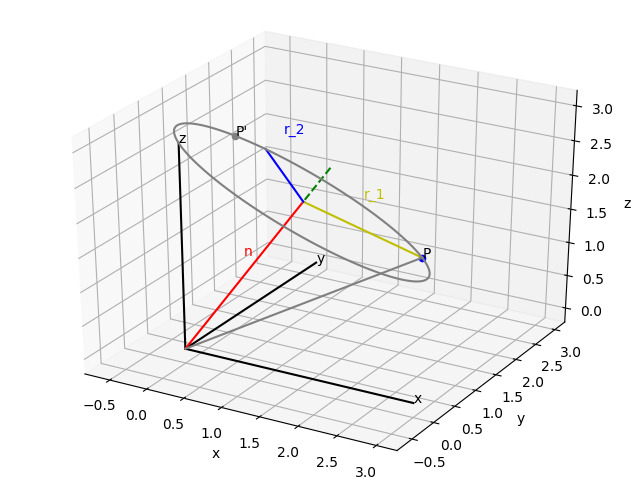

In [7]:
# PLOT
# initialize plot:
fig = figure()
ax = Axes3D(fig)
# data:
ax.scatter(P[0],P[1],P[2],color='b') 
ax.scatter(P_prm[0],P_prm[1],P_prm[2],color='gray') 
# plot text:
ax.text(P[0],P[1],P[2],"P", size=10, zorder=1, color='k') 
ax.text(P_prm[0],P_prm[1],P_prm[2],"P'", size=10, zorder=1, color='k') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# plot axis:
ax.plot((-0,axLim),(0,0),(0,0), color='k')
ax.plot((0,0),(-0,axLim),(0,0), color='k')
ax.plot((0,0),(0,0),(-0,axLim), color='k')
ax.text(axLim,0,0,"x", size=10, zorder=1, color='k') 
ax.text(0,axLim,0,"y", size=10, zorder=1, color='k') 
ax.text(0,0,axLim,"z", size=10, zorder=1, color='k') 

# plot rotation axis
ax.plot((n[0],0),(n[1],0),(n[2],0), color='r')
ax.plot((P_len*n_hat[0],n[0]),(P_len*n_hat[1],n[1]),(P_len*n_hat[2],n[2]), color='g',linestyle='dashed')

ax.plot((n[0],P[0]),(n[1],P[1]),(n[2],P[2]), color='y') # r_1
ax.plot((n[0],n[0]+r_2[0]),(n[1],n[1]+r_2[1]),(n[2],n[2]+r_2[2]), color='b') # r_2
ax.plot((P[0],0),(P[1],0),(P[2],0), color='gray') # vector P
ax.plot(circlePoints[:,0],circlePoints[:,1],circlePoints[:,2], color='gray') # circle

# vectors text
ax.text(n[0]/2,n[1]/2,1.3*n[2]/2,"n", size=10, zorder=1, color='r') 
ax.text((n[0]+P[0])/2,(n[1]+P[1])/2,1.3*(n[2]+P[2])/2,"r_1", size=10, zorder=1, color='y')
ax.text((2*n[0]+r_2[0])/2,(2*n[1]+r_2[1])/2,1.3*(2*n[2]+r_2[2])/2,"r_2", size=10, zorder=1, color='b')


pyplot.show()

## The formula

The Rodriguez's formula is:

${\vec P' = \{\mathbf{I} + \sin(\theta) [\hat n]_\times + (1-\cos(\theta)[\hat n]_\times^2\}\cdot \vec P = \mathbf{R} \cdot \vec P}$

when ${\vec P'}$ is the new vector, $\mathbf{I}$ is the indentity matrix, and ${[\hat n]_\times}$ is the cross pruduct matrix and it is defind:

${[\hat n]_\times = 
\begin{pmatrix}
0 \ -\hat n_z \ \hat n_y \\ 
\hat n_z \ 0 \ -\hat n_x \\ 
-\hat n_y \ \hat n_x \ 0
\end{pmatrix}}$

note that ${\hat n \times \vec v = [\hat n]_\times \vec v}$

In [8]:
# R is the Rodriguez's Matrix
def R(n_hat,theta):
    n_cross = np.array([[0,-n_hat[2],n_hat[1]],[n_hat[2],0,-n_hat[0]],[-n_hat[1],n_hat[0],0]])
    return np.eye(3) + np.sin(theta) * n_cross + (1-np.cos(theta)) * np.dot(n_cross, n_cross)

In [9]:
# find the point P' using Rodroguez's formula:
P_rod = np.dot(R(n_hat,theta_0),P)

<IPython.core.display.Javascript object>


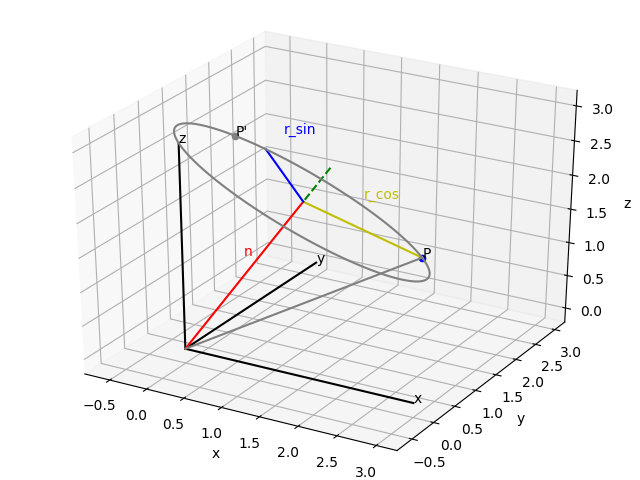

In [10]:
# initialize plot:
fig = figure()
ax = Axes3D(fig)
# data:
ax.scatter(P[0],P[1],P[2],color='b') 
ax.scatter(P_prm[0],P_prm[1],P_prm[2],color='gray') 
# plot text:
ax.text(P[0],P[1],P[2],"P", size=10, zorder=1, color='k') 
ax.text(P_prm[0],P_prm[1],P_prm[2],"P'", size=10, zorder=1, color='k') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# plot axis:
ax.plot((-0,axLim),(0,0),(0,0), color='k')
ax.plot((0,0),(-0,axLim),(0,0), color='k')
ax.plot((0,0),(0,0),(-0,axLim), color='k')
ax.text(axLim,0,0,"x", size=10, zorder=1, color='k') 
ax.text(0,axLim,0,"y", size=10, zorder=1, color='k') 
ax.text(0,0,axLim,"z", size=10, zorder=1, color='k') 

# plot rotation axis
ax.plot((n[0],0),(n[1],0),(n[2],0), color='r')
ax.plot((P_len*n_hat[0],n[0]),(P_len*n_hat[1],n[1]),(P_len*n_hat[2],n[2]), color='g',linestyle='dashed')

ax.plot((n[0],P[0]),(n[1],P[1]),(n[2],P[2]), color='y') # r_1
ax.plot((n[0],n[0]+r_2[0]),(n[1],n[1]+r_2[1]),(n[2],n[2]+r_2[2]), color='b') # r_2
ax.plot((P[0],0),(P[1],0),(P[2],0), color='gray') # vector P
ax.plot(circlePoints[:,0],circlePoints[:,1],circlePoints[:,2], color='gray') # circle

# vectors text
ax.text(n[0]/2,n[1]/2,1.3*n[2]/2,"n", size=10, zorder=1, color='r') 
ax.text((n[0]+P[0])/2,(n[1]+P[1])/2,1.3*(n[2]+P[2])/2,"r_cos", size=10, zorder=1, color='y')
ax.text((2*n[0]+r_2[0])/2,(2*n[1]+r_2[1])/2,1.3*(2*n[2]+r_2[2])/2,"r_sin", size=10, zorder=1, color='b')

pyplot.show()

In the ${\mathbf R}$ matrix, there are three terms:
1. ${\mathbf{I}}$
2. ${\sin(\theta) [\hat n]_\times}$
3. ${(1-\cos(\theta))[\hat n]_\times^2}$

After multipling ${\mathbf R}$ by $\vec P$, the first term yields $\vec P$, the second yields the vecror r_sin (the blue one in the plot above) starting from the middle of the circle and orthogonal to $\vec n$ and r_cos, and the last term yields the vector r_cos (the yellow one), starting from the point $\vec P$ and pointing to the middle of the circle, 

1. ${\mathbf{I} \vec P = \vec P}$
2. ${\sin(\theta) [\hat n]_\times \vec P = \sin(\theta) \hat n \times \vec P = \sin(\theta) |\hat n| |\vec P| \sin(\alpha) \hat r_{sin}= \sin(\theta) |\vec P| \sin(\alpha)\hat r_{sin}}$
3. ${(1-\cos(\theta))[\hat n]_\times^2 \vec P 
= (1-\cos(\theta)) \hat n \times \hat n \times \vec P 
= (1-\cos(\theta))  |\vec P|\sin(\alpha) \hat n \times  \hat r_{sin} 
= (1-\cos(\theta))  |\vec P|\sin(\alpha) \hat r_{cos} }$

## Small Angle 

If $\theta$ is small we can write:

${\mathbf R = \mathbf{I} + \sin(\theta) [\hat n]_\times + (1-\cos(\theta)[\hat n]_\times^2 = \mathbf{I} + \theta [\hat n]_\times}$

In [11]:
def R_linear(n_hat,theta):
    n_cross = np.array([[0,-n_hat[2],n_hat[1]],[n_hat[2],0,-n_hat[0]],[-n_hat[1],n_hat[0],0]])
    return np.eye(3) + theta * n_cross

In [12]:
theta_0 = np.pi/10 # the angle
P_rod = np.dot(R(n_hat,theta_0),P) # precise point
P_smallAngle = np.dot(R_linear(n_hat,theta_0),P) # 

<IPython.core.display.Javascript object>


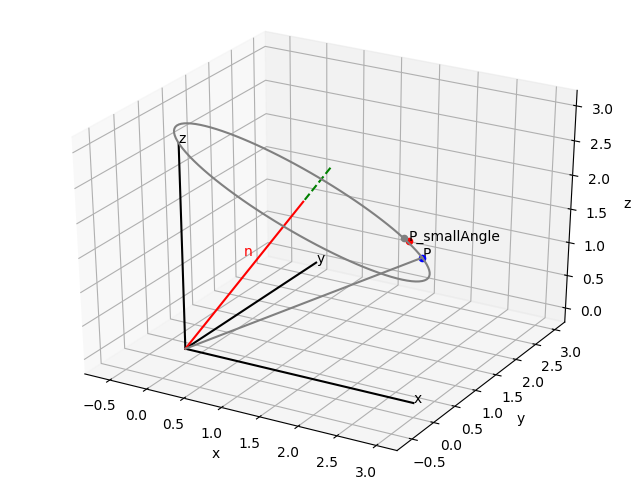

In [13]:
# initialize plot:
fig = figure()
ax = Axes3D(fig)
# data:
ax.scatter(P[0],P[1],P[2],color='b') 
ax.scatter(P_rod[0],P_rod[1],P_rod[2],color='gray') 
ax.scatter(P_smallAngle[0],P_smallAngle[1],P_smallAngle[2],color='r') 

# plot text:
ax.text(P[0],P[1],P[2],"P", size=10, zorder=1, color='k') 
#ax.text(P_rod[0],P_rod[1],P_rod[2],"P'", size=10, zorder=1, color='k') 
ax.text(P_smallAngle[0],P_smallAngle[1],P_smallAngle[2],"P_smallAngle", size=10, zorder=1, color='k') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# plot axis:
ax.plot((-0,axLim),(0,0),(0,0), color='k')
ax.plot((0,0),(-0,axLim),(0,0), color='k')
ax.plot((0,0),(0,0),(-0,axLim), color='k')
ax.text(axLim,0,0,"x", size=10, zorder=1, color='k') 
ax.text(0,axLim,0,"y", size=10, zorder=1, color='k') 
ax.text(0,0,axLim,"z", size=10, zorder=1, color='k') 

# plot rotation axis
ax.plot((n[0],0),(n[1],0),(n[2],0), color='r')
ax.plot((P_len*n_hat[0],n[0]),(P_len*n_hat[1],n[1]),(P_len*n_hat[2],n[2]), color='g',linestyle='dashed')

ax.plot((P[0],0),(P[1],0),(P[2],0), color='gray') # vector P
ax.plot(circlePoints[:,0],circlePoints[:,1],circlePoints[:,2], color='gray') # circle

# vectors text
ax.text(n[0]/2,n[1]/2,1.3*n[2]/2,"n", size=10, zorder=1, color='r') 

pyplot.show()

## Unit Quaternions

Using the vector $\vec q = (x,y,z,w) = (\vec v,w) = (\sin(\theta/2)\hat n, \cos(\theta/2))$ 

and the idnetities ${\sin()\theta = 2\sin(\theta/2)\cos(\theta/2)}$ and ${(1-\cos(\theta)) = 2 \sin^2(\theta/2)}$

we can write:  ${\mathbf R(\vec q) = \mathbf I + 2w[\vec v]_{\times} + 2[\vec v]^2_{\times}}$